# EXP3

In this exercise, we will be experimenting with the Multi-armed bandit problem with the EXP3 algorithm.

## Setup

Consider an unstructured bandit problem. Suppose that we have $k$ arms, each with random reward at time $t$ given by $rew[t] = avg[t] + \epsilon[t]$ where $\epsilon[t]$ is drawn from an i.i.d. standard Gaussian distribution.
The following code should be implemented to capture this setup.

# Reward function
Question: Implement the reward function described in the setup. Specifically, given a $k$- dimensional vector 'avg', return $k$- dimensional vector 'rew' such that $rew[t] = avg[t] + \epsilon[t]$ where $\epsilon[t] \sim \mathcal{N}(0,0.01 \times I)$ where $I$ is the identity matrix of size $k \times k$.

In [1]:
def get_reward(avg, var):
    cov = var * np.identity(len(avg))
    rew = avg + np.random.multivariate_normal(np.zeros(len(avg)), cov)
    return rew

## Algorithm review


Recall there are three parameters of interest in the EXP3 algoritm: $(n, k, \eta),$ where $n$ is the time horizon, $k$ is the number of arms, and $\eta$ is a learning rate. Please refer to the text book (Algorithm 9 page 152) for details.


## Goal of this exercise

Implement the following using the template provided below. Please use the variable names suggested in the comments.

1. Basic EXP3 algorithm implementation
2. Plot the expected cumulative regret of the EXP3 algorithm vs. horizon ($n$).
3. The cumulative regret is expected to be logarithmic against the horizon. To check that this is case, plot the logarithm of the expected cumulative regret of the EXP3 algorithm vs. horizon ($n$). (Hint: use the semilogx function in matplotlib.pyplot) 

# Import Dependencies

In [2]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

## EXP3
Question:

Implement the EXP3 algorithm using the skeleton below. The initialization part is done. Fill out the rest of the skeleton.

In [3]:
class EXP3:
    def __init__(self, avg, eta):
        self.means = avg
        self.num_arms = avg.size
        self.eta = eta
        self.best_arm = np.argmax(self.means)
        self.restart()

    def restart(self):
        self.time = 0.0
        self.num_plays = np.zeros(self.num_arms)
        self.probs_arr = (1 / self.num_arms) * np.ones(self.num_arms)
        self.S = np.zeros(self.num_arms)
        self.cum_reg = [0]

    def get_best_arm(self):
        return np.random.choice(self.num_arms, p=self.probs_arr)

    def update_exp3(self, arm, rew_vec):
        self.probs_arr = np.exp(self.eta * self.S) / sum(np.exp(self.eta * self.S))
        for i in range(self.num_arms):
            if arm == i:
                self.S[i] += 1 - (1 - rew_vec[i]) / self.probs_arr[i]
            else:
                self.S[i] += 1

    def update_reg(self, arm, rew_vec):
        self.cum_reg += [self.cum_reg[-1] + rew_vec[self.best_arm] - rew_vec[arm]]

    def iterate(self, rew_vec):
        self.time += 1.0
        play = self.get_best_arm()
        self.update_exp3(play, rew_vec)
        self.update_reg(play, rew_vec)

# Experiment Function

The following code runs the EXP3 algorithm for multiple instances. In the code below, num_inst is the number of instances, and num_iter is the time at which we stop.

In [4]:
def run_algo(avg, eta, num_iter, num_inst, var):
    reg = np.zeros((num_inst, num_iter))
    algo = EXP3(avg, eta)

    for k in range(num_inst):
        algo.restart()

        if (k + 1) % 10 == 0:
            print(f'Instance number = {k + 1}')

        for t in range(num_iter - 1):
            rew_vec = get_reward(avg, var)
            algo.iterate(rew_vec)

        reg[k, :] = np.asarray(algo.cum_reg)

    return reg

# Initializations
Use the following to initialize your algorithm. The value of $k$ is implicitly set to $3$ in the initialization below. (This vector contains the actual mean rewards).

In [5]:
avg = np.asarray([0.8,0.7,0.5])
num_iter,num_inst = int(2e3),20
eta = np.sqrt(np.log(avg.size) / (num_iter * avg.size))
var = 0.01

# Run Experiment

In [6]:
reg = run_algo(avg, eta, num_iter, num_inst, var)

Instance number = 10
Instance number = 20


## Plotting the Results

Questions: 

1 - Compute the average regret over the number of instances and plot it against the number of iterations. Label the x-axis as time, and the y-axis as Cumulative Regret. Add a caption labeling this as 'Cumulative Regret with EXP3'.

2 - Use the semilogx function in matplotlib to check that the regret is logarithmic against horizon.

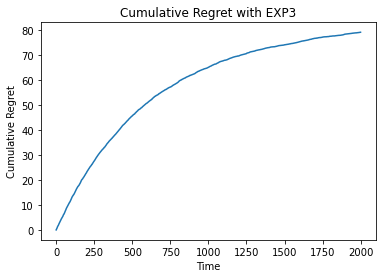

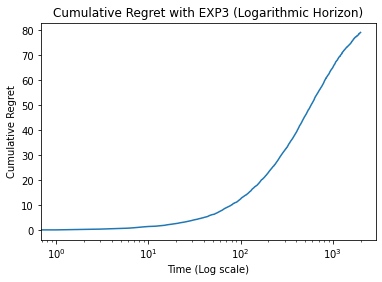

In [7]:
# 1 - Compute the average regret over the number of instances and plot it against the number of iterations.
mean_reg = np.mean(reg, axis=0)
plt.plot(np.arange(num_iter), mean_reg)
plt.xlabel('Time')
plt.ylabel('Cumulative Regret')
plt.title('Cumulative Regret with EXP3')
plt.show()

# 2 - Use the semilogx function in matplotlib to check that the regret is logarithmic against horizon.
plt.semilogx(np.arange(num_iter), mean_reg)
plt.xlabel('Time (Log scale)')
plt.ylabel('Cumulative Regret')
plt.title('Cumulative Regret with EXP3 (Logarithmic Horizon)')
plt.show()